<a href="https://colab.research.google.com/github/03mayankdubey/Twitter-sentiment-and-emotion-analysis/blob/main/finalyear_proejct_of_data_represenatations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Requirements

In [ ]:
!pip install GetOldTweets3
!pip install wordcloud

In [ ]:

import GetOldTweets3 as got
import pandas as pd
import string
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import sys
from os import path

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
#nltk.download()'''
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## **Gettig Tweets from Twitter and Cleaning**

In [ ]:
def get_tweets():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('India')\
                                           .setSince("2020-05-01")\
                                           .setUntil("2020-06-15")\
                                           .setMaxTweets(10000)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [ ]:
text = ""
text_tweets = get_tweets()
lenght  = len(text_tweets)
for i in range(0, lenght):
    text = text_tweets[i][0] + " " + text

In [ ]:

lower_case =text.lower()
#print(lower_case)
cleaned_text = lower_case.translate(str.maketrans("", "",string.punctuation))
print(cleaned_text)

aur hum virtual rallies main mast hai 2 hell with the people of india we will do what we want 2 do evhgear hello my dad is a huge fan and had asked for a pit of red and black frankenstein high tops for father’s day in may shortly after my grandad my dads died passed away and in grieving i completely forgot about the shoes until today sir your friend karanjohar is trending take out a few seconds to read what india thinks about him it will help you decide whether to give him an appointment or click a photo with himif you were in bollywood he would have made sure you failed as we are all common indians  3 held for making guns after watching videos then please explain what is death according to the vedas  ooh respected sr pm narendramodi boss please help me ihave stuck here since march 31 iam jobless visit toriest visa please help me to go back india hyderabad ppt1125057 syednazee 0561863177 please help me iam jobless faceing many financial situation please help  yasss honey now already al

In [ ]:
# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "english")

In [ ]:
# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [ ]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
emotion_list = []
with open('/content/drive/My Drive/final year project/emotion.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)



[' cheated', ' loved', ' loved', ' attracted', ' angry', ' attracted', ' esteemed', ' fearful', ' lustful', ' attached', ' attracted', ' independent', ' embarrassed', ' attached', ' sad', ' cheated', ' angry', ' powerless', ' sad', ' angry', ' fearless', ' bored', ' fearless', ' happy', ' safe', ' adequate', ' fearless', ' attracted', ' hated', ' cheated', ' attached', ' fearful', ' happy', ' average', ' adequate', ' attracted', ' surprise', ' attached', ' powerless', ' fearful', ' attracted', ' hated', ' angry', ' sad', ' attracted', ' sad', ' attracted', ' powerless', ' sad', ' loved', ' focused', ' demoralized', ' angry', ' belittled', ' sad', ' sad', ' anxious', ' sad', ' attracted', ' attached', ' adequate', ' happy', ' alone', ' cheated', ' fearful', ' ecstatic', ' fearful', ' sad', ' focused', ' powerless', ' free', ' angry', ' fearless', ' happy', ' happy', ' sad', ' singled out', ' happy', ' fearless', ' sad', ' happy', ' attracted', ' lustful', ' happy', ' sad', ' hated', ' e

# **Overall Sentiment of the Searched Topic**

In [ ]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

print(sentiment_analyse(cleaned_text))

Positive Sentiment
None


## Bar Graph of **Emotions**

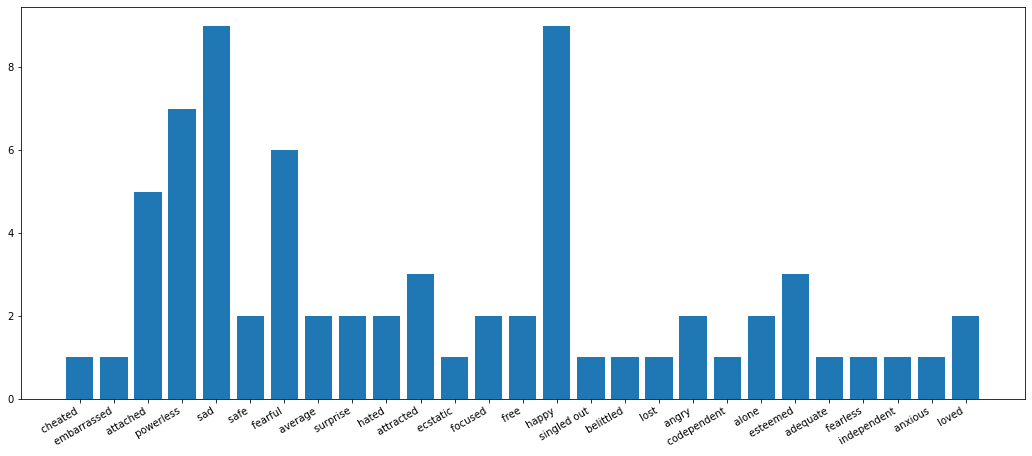

In [ ]:
plt.rcParams['figure.figsize'] = [18, 8]

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('china_bar.png')
plt.show()


## **Pie Chart**

<Figure size 576x576 with 0 Axes>

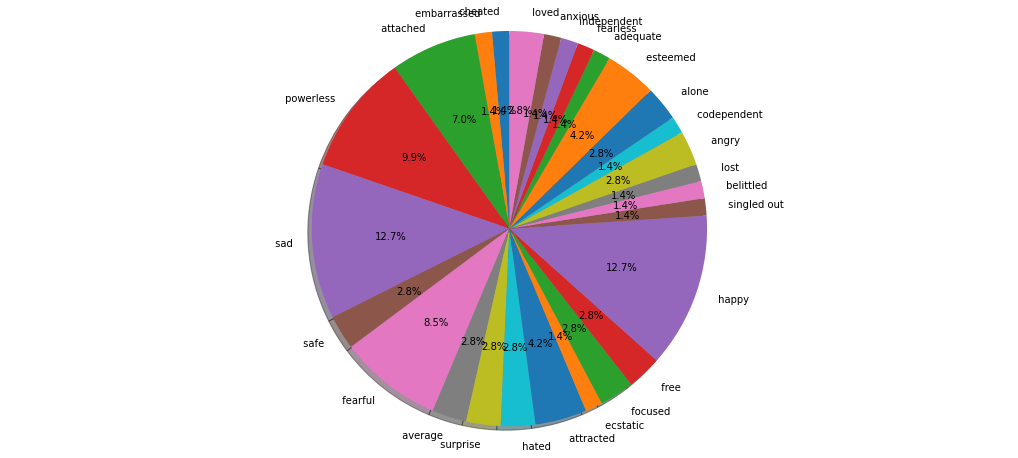

In [ ]:
x=[]
y=[]
x= w.keys()
y = w.values()
labels =x 
sizes =y
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1 = plt.gcf()
fig1.set_size_inches(8,8)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True , startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('china_pie_chart.png')
plt.show()

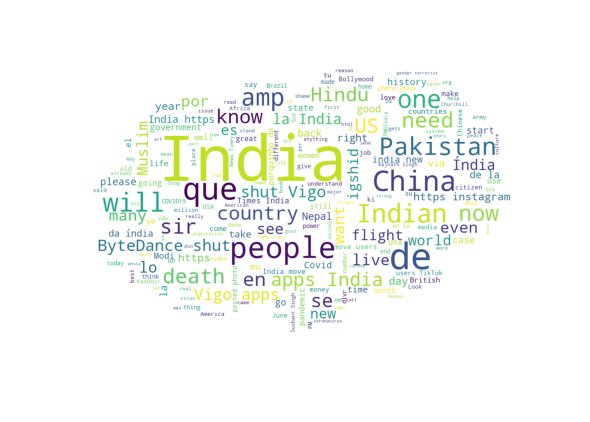

<Figure size 1296x576 with 0 Axes>

In [ ]:
def create_wordcloud(text):
  mask = np.array(Image.open("/content/drive/My Drive/final year project/cloud.png"))
  stopwords = set(STOPWORDS)
  wc = WordCloud(background_color= "white", max_words = 200, mask = mask, stopwords = stopwords)
  wc.generate(text)
  plt.figure(figsize=( 8, 8), facecolor = None)
  plt.imshow(wc)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()
  plt.savefig('china_word_cloud.png')

create_wordcloud(text)